In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.shape

(2227, 3)

In [5]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [6]:
data.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

C:\Users\Ratnesh\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

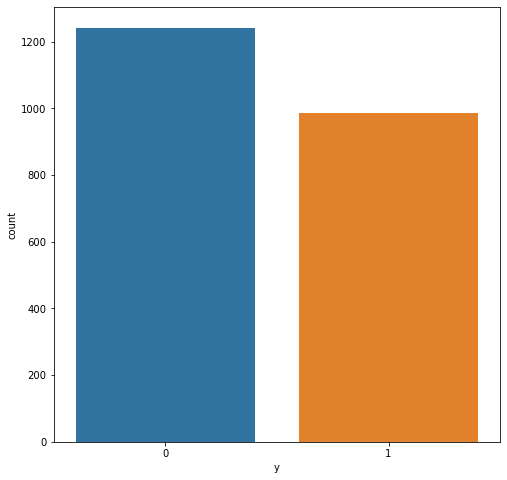

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(data.y)

In [18]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [22]:
data.sample(20)

,x1,x2,y
1546,72.971900,53.901978,0
1406,-21.126047,-66.301628,0
1747,-52.517662,-68.182923,0
143,1.633331,-9.000000,1
425,-98.261053,57.852963,1
466,-117.366669,105.000000,1
488,-118.366669,132.000000,1
736,-89.604959,76.456598,1
270,96.303766,-114.715946,1
1127,28.956816,12.170777,0


In [20]:
data.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


# Dealing with Outliers

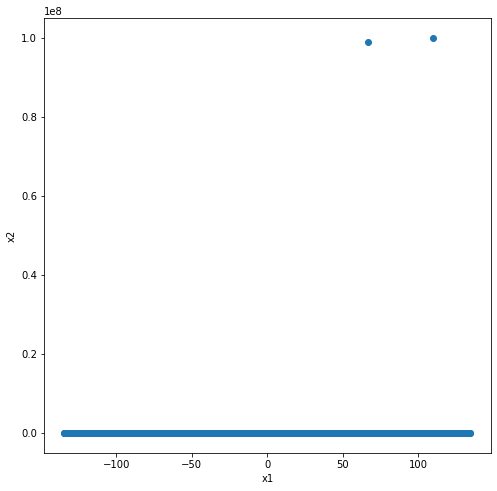

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data['x1'], data['x2'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [23]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.52953452e+00 2.99941733e-02 1.12337775e+00]
 [1.28583072e+00 2.99999411e-02 1.12337775e+00]
 [1.67518040e+00 2.99969302e-02 1.12337775e+00]
 ...
 [1.20720924e+00 2.99979109e-02 8.90172516e-01]
 [1.11758091e+00 3.00063617e-02 8.90172516e-01]
 [1.52687860e+00 3.34595047e+01 8.90172516e-01]]


In [24]:
threshold = 3
print(np.where(z > 3))

(array([1533, 2218], dtype=int64), array([1, 1], dtype=int64))


In [26]:
data_o = data[(z < 3).all(axis=1)]

In [28]:
data_o.shape

(2217, 3)

In [31]:
x=data_o.drop(['y'],axis=1)
y=data_o.y

In [32]:
x.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [36]:
print(y.value_counts())

0    1236
1     981
Name: y, dtype: int64


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=lg.predict(x_test)
score_lg=accuracy_score(y_test,y_pred)

In [115]:
print("The score obtained with logistic regression is: ",score_lg*100,"%")

The score obtained with logistic regression is:  76.57657657657657 %


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       250
           1       1.00      0.46      0.63       194

    accuracy                           0.77       444
   macro avg       0.85      0.73      0.73       444
weighted avg       0.83      0.77      0.74       444



<AxesSubplot:>

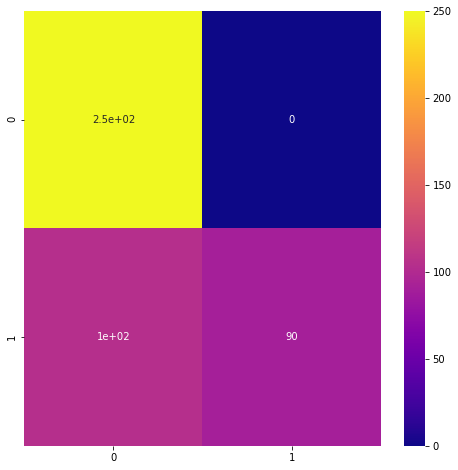

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='plasma')

# SVM

In [63]:
from sklearn.svm import SVC
sv=SVC()  #Here default kernal used is rbf
sv_2=SVC(kernel='linear')
sv.fit(x_train,y_train)

SVC()

In [64]:
sv_2.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
y_pred_sv=sv.predict(x_test)
y_pred_sv_2=sv_2.predict(x_test)
score_sv=accuracy_score(y_test,y_pred_sv)
score_sv_2=accuracy_score(y_test,y_pred_sv_2)

### Printing classification report and confusion of 'rbf' kernal(SVM)

In [77]:
print("The score obtained using SVM with the help of rbf kernel is: ",score_sv*100,"%")

The score obtained using SVM with the help of rbf kernel is:  95.4954954954955 %


In [73]:
print("The classification report of SVM with rbf kernal: ")
print(classification_report(y_test,y_pred_sv))

The classification report of SVM with rbf kernal: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



The confusion matrix of rbf kernal: 


<AxesSubplot:>

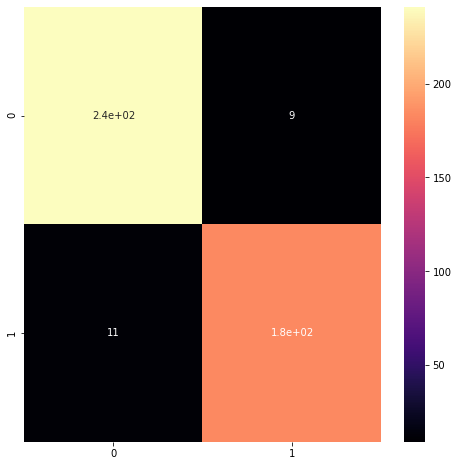

In [74]:
print("The confusion matrix of rbf kernal: ")
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_sv),annot=True,cmap='magma')

### Printing classification report and confusion of 'linear' kernal(SVM)

In [78]:
print("The score obtained using SVM with the help oflinear kernal is: ",score_sv_2*100,"%")

The score obtained using SVM with the help oflinear kernal is:  75.90090090090091 %


In [75]:
print("The classification report of SVM with linear kernal: ")
print(classification_report(y_test,y_pred_sv_2))

The classification report of SVM with linear kernal: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       250
           1       1.00      0.45      0.62       194

    accuracy                           0.76       444
   macro avg       0.85      0.72      0.72       444
weighted avg       0.83      0.76      0.73       444



The confusion matrix of linear kernal: 


<AxesSubplot:>

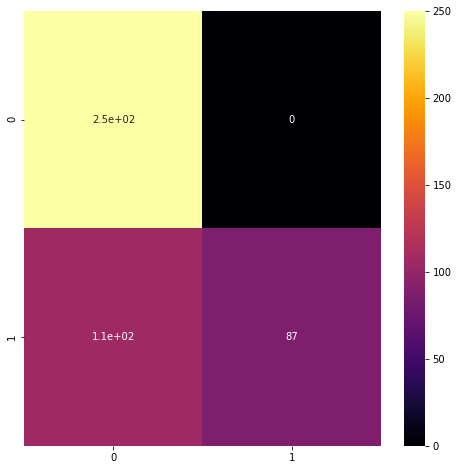

In [76]:
print("The confusion matrix of linear kernal: ")
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_sv_2),annot=True,cmap='inferno')

# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(random_state=0)

In [80]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [86]:
y_pred_tree=tree.predict(x_test)
score_tree=accuracy_score(y_test,y_pred_tree)
print("The score obtained using decision tree is: ",score_tree*100,"%")

The score obtained using decision tree is:  93.46846846846847 %


In [87]:
print("The classification report of decision tree is: ")
print(classification_report(y_test,y_pred_tree))

The classification report of decision tree is: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       250
           1       0.92      0.93      0.93       194

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



The confusion matrix of decision tree is: 


<AxesSubplot:>

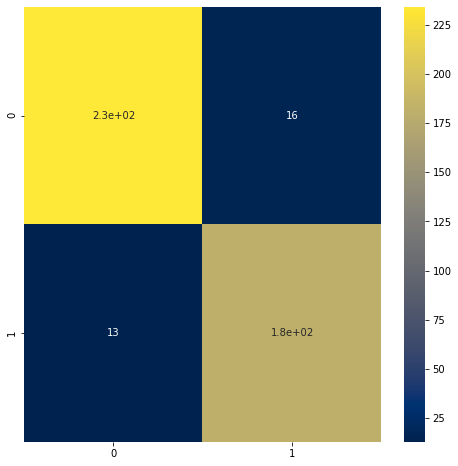

In [88]:
print("The confusion matrix of decision tree is: ")
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_tree),annot=True,cmap='cividis')

# KNN 

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [112]:
y_pred_knn=knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred_knn)
print("The score obtained using knn is: ",score_knn*100,"%")

The score obtained using knn is:  95.72072072072072 %


In [113]:
print("The classification report of knn is: ")
print(classification_report(y_test,y_pred_knn))

The classification report of knn is: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       250
           1       0.97      0.93      0.95       194

    accuracy                           0.96       444
   macro avg       0.96      0.95      0.96       444
weighted avg       0.96      0.96      0.96       444



The confusion matrix of knn is: 


<AxesSubplot:>

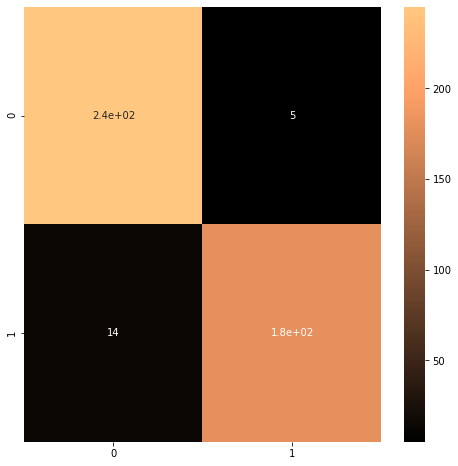

In [114]:
print("The confusion matrix of knn is: ")
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,cmap='copper')

# Observation which model is better

## The best model for the given data is KNN with n_neighbours=2.